In [36]:
import numpy as np
import pandas as pd
import itertools
from src.HopfieldModel import *

abecedario = {
    0: 'A',
    1: 'B',
    2: 'C',
    3: 'D',
    4: 'E',
    5: 'F',
    6: 'G',
    7: 'H',
    8: 'I',
    9: 'J',
    10: 'K',
    11: 'L',
    12: 'M',
    13: 'N',
    14: 'O',
    15: 'P',
    16: 'Q',
    17: 'R',
    18: 'S',
    19: 'T',
    20: 'U',
    21: 'V',
    22: 'W',
    23: 'X',
    24: 'Y',
    25: 'Z',
}
letras = get_patterns("data/letters.txt")

# Generar todas las combinaciones de 4 vectores de 26
combinaciones = list(itertools.combinations(range(26), 4))

# Calcular la ortogonalidad para cada combinación
resultados = []
for comb in combinaciones:
    sub_vectores = np.array([letras[comb[0]],letras[comb[1]],letras[comb[2]],letras[comb[3]]])
    mean_dot_product, max_value, max_dot_product = ortogonality4(sub_vectores)
    combinacion = [abecedario[i] for i in comb]
    resultados.append((combinacion, mean_dot_product, max_value, max_dot_product))

resultados = pd.DataFrame(resultados, columns=['Combinación', 'Medio', 'Máx', 'Frec'])


In [37]:
resultados = resultados.sort_values(by=['Máx','Medio'], ascending=False)
resultados.head(5)

,Combinación,Medio,Máx,Frec
11534,"[H, M, N, W]",18.333,21,2.0
2815,"[B, E, G, S]",18.000,21,3.0
1106,"[A, F, P, R]",17.667,21,2.0
7952,"[E, G, Q, S]",17.667,21,3.0
7771,"[E, F, P, R]",17.333,21,2.0


In [38]:
resultados.tail(5)

,Combinación,Medio,Máx,Frec
9763,"[F, M, O, Z]",2.000,3,3.0
9936,"[F, O, W, Z]",2.000,3,3.0
13809,"[L, P, T, V]",2.000,3,3.0
13873,"[L, R, T, V]",1.667,3,2.0
13875,"[L, R, T, X]",1.333,3,1.0


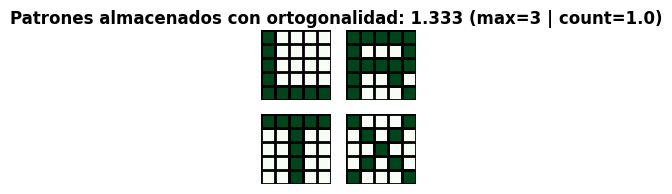

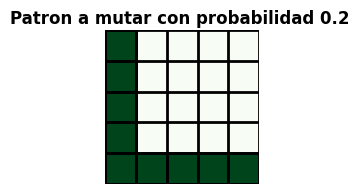

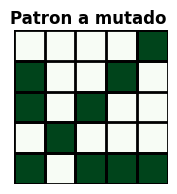

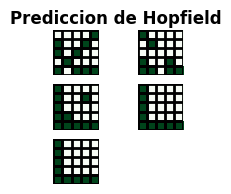

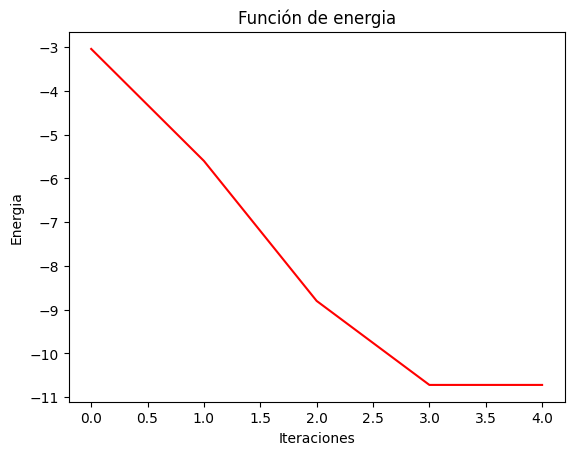

In [42]:
from src.HopfieldModel import *

letras = get_patterns("data/letters.txt")
#plot_patterns(letras, "Patrones")

EPOCHS = 100
MUTATE_PROB = 0.2

letters_to_train = [letras[11], letras[17], letras[19], letras[23]]
letters_to_train = np.array(letters_to_train)
mean_dot_product, max_value, max_dot_product = ortogonality4(letters_to_train) 
plot_patterns(letters_to_train, f"Patrones almacenados con ortogonalidad: {mean_dot_product} (max={max_value} | count={max_dot_product})")

hopfield = Hopfield(letters_to_train, EPOCHS)

random_idx = np.random.randint(len(letters_to_train))
letter_to_mutate = letters_to_train[random_idx]
plot_patterns(letter_to_mutate.reshape((1, len(letter_to_mutate))), f"Patron a mutar con probabilidad {MUTATE_PROB}")

letter_mutated = mutate(letter_to_mutate, MUTATE_PROB)
plot_patterns(letter_mutated.reshape((1, len(letter_mutated))), f"Patron a mutado")

#PREDICIENDO
arr_patterns, arr_energy = hopfield.predict(letter_mutated)

#print(arr_patterns)
#print(arr_energy)
plot_patterns(arr_patterns, "Prediccion de Hopfield")
plot_energy(arr_energy)


